<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check the info of the dataset (data types, missing values)
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
#Basic Data Cleaning
# Fill missing values with 'Unknown' or other appropriate values
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

df.dropna(subset=['title','rating'],inplace=True)

<ipython-input-8-dde3195690cd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown',inplace=True)
<ipython-input-8-dde3195690cd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


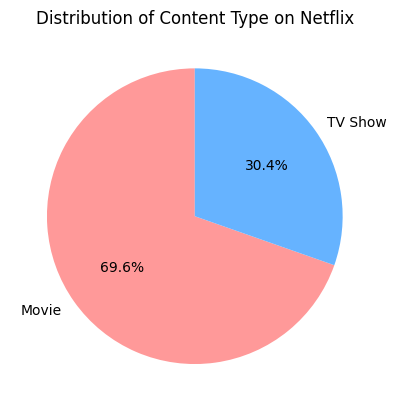

In [10]:
#What are the different types of content on Netflix?
df['type'].value_counts()

#visualization
import matplotlib.pyplot as plt

# Plotting the content type distribution
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Content Type on Netflix')
plt.ylabel('')  # hide y-label
plt.show()


Text(0, 0.5, 'Count')

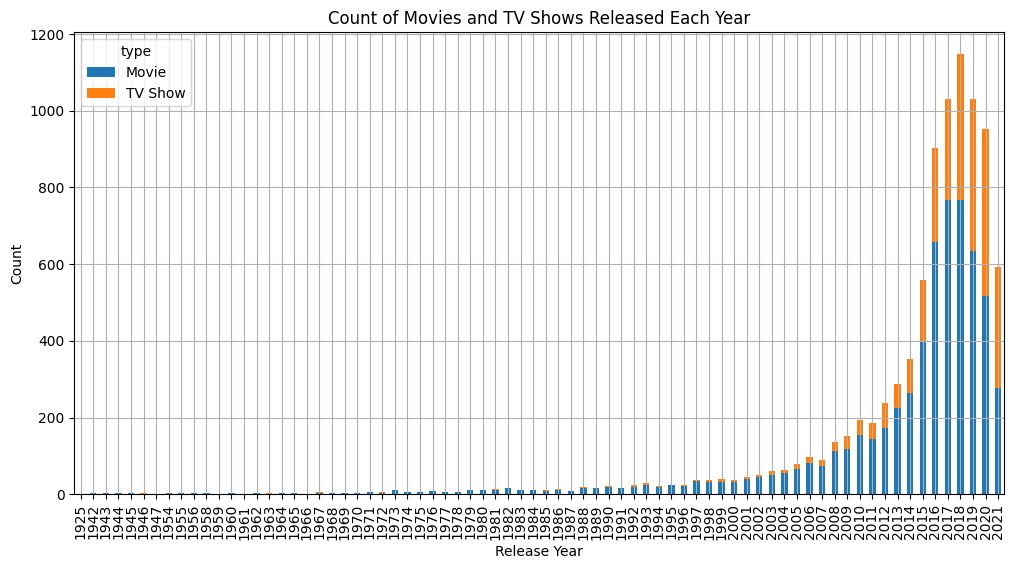

In [11]:
#What is the count of movies and TV shows released each year?
release_trend=df.groupby(['release_year','type']).size().unstack()

# Plot the trend
release_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Count of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.grid()
plt.ylabel('Count')



<ipython-input-13-bd172744934c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


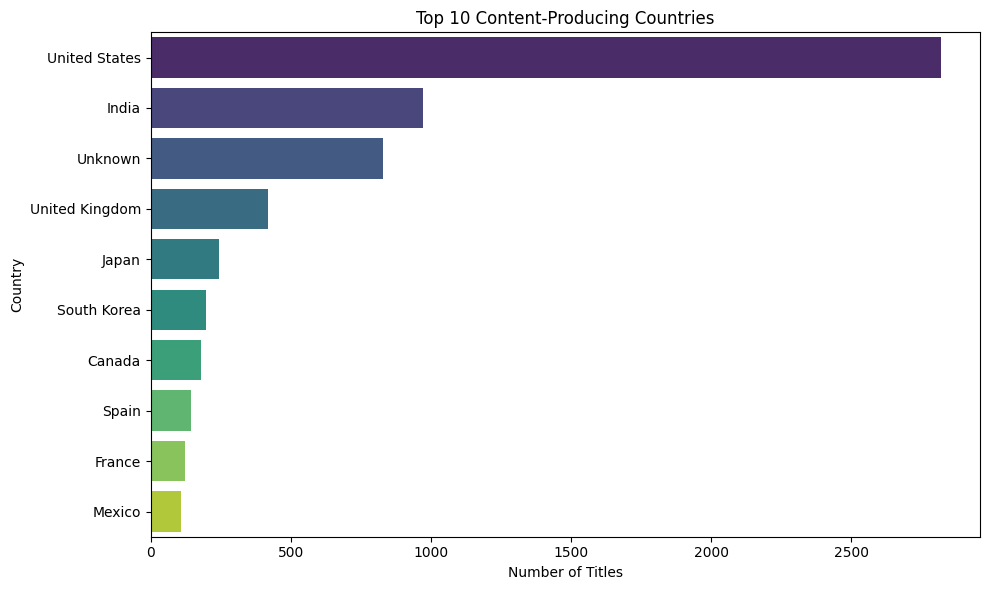

In [13]:
# Top 10 Content-Producing Countries
# Count the number of shows per country
top_countries=df['country'].value_counts().head(10)
import seaborn as sns
# Plot the top 10 countries
# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-14-6de6bc128192>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


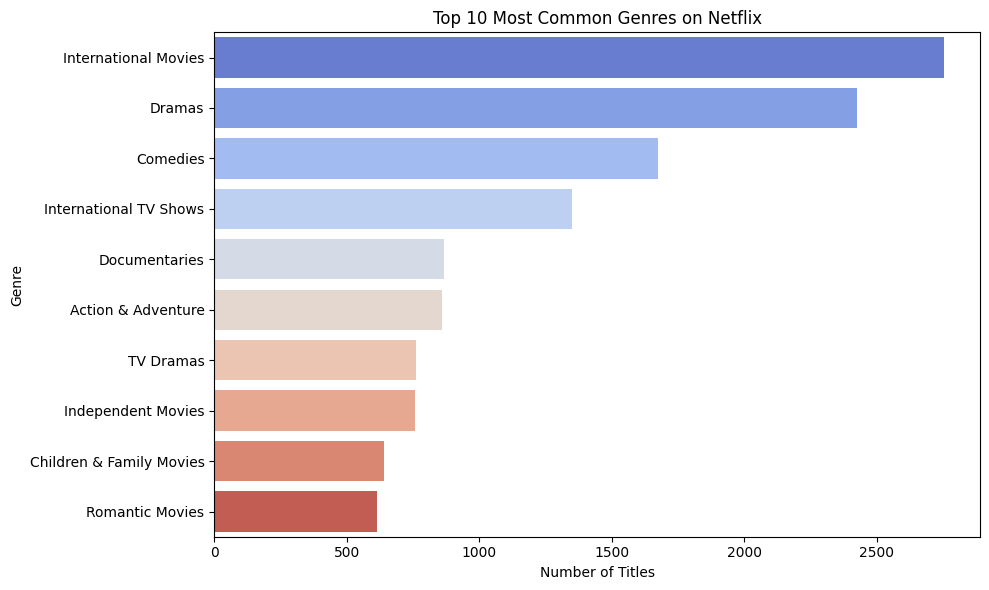

In [14]:
#Most Common Genres on Netflix
# Split the genres and count each one
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)

# Get the top 10 genres
top_genres = pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [15]:
#📊 Step: Top 10 Countries Producing Most Content
# Drop missing values in 'country' column

country_series=df['country'].dropna()

# Split countries in rows with multiple entries
country_list=country_series.apply(lambda x:[c.strip() for c in x.split(',')])

# Flatten the list
all_countries = [c for sublist in country_list for c in sublist]

# Count country occurrences
from collections import Counter
country_counts = Counter(all_countries)

# Convert to Series and get top 10
top_countries = pd.Series(dict(country_counts)).sort_values(ascending=False).head(10)

# Display
print("Top 10 Countries Producing Content:")
print(top_countries)

Top 10 Countries Producing Content:
United States     3690
India             1046
Unknown            830
United Kingdom     806
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
dtype: int64


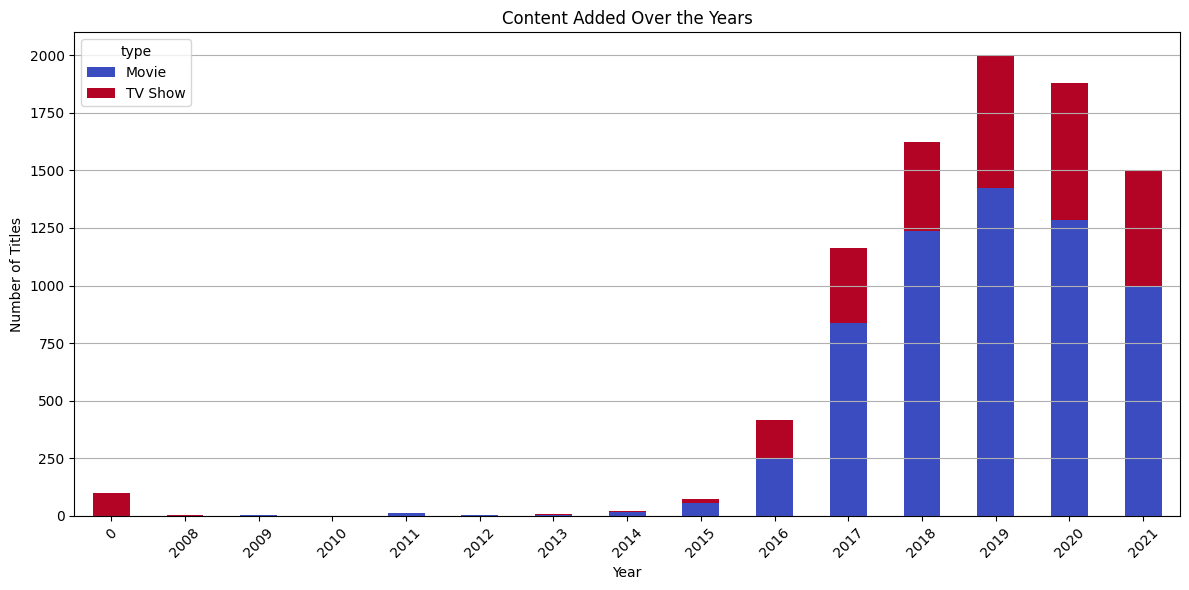

In [17]:
#📈 Step: Trend of Content Added Over the Years
#📈 Step: Trend of Content Added Over the Years
# Convert 'date_added' to datetime format, handling errors and inconsistent formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='%B %d, %Y')

# Extract year from 'date_added'
# Handle NaT (Not a Time) values that might result from conversion errors
df['year_added'] = df['date_added'].dt.year.fillna(0).astype(int)

# Group by year and type (Movie/TV Show)
content_trend = df.groupby(['year_added','type']).size().unstack()

# Plot the trend
content_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
#🎭 Step: Analyzing Top Actors on Netflix
# Drop missing values in 'cast' and split actor names
cast_series=df['cast'].dropna().apply(lambda x: [actor.strip() for actor in x.split(',')])

# Flatten the list of lists into one list of all actors
all_actors=[actor for sublist in cast_series for actor in sublist]

# Count appearances of each actor
actor_counts = Counter(all_actors)

# Create a Series from the dictionary and get top 10 actors
top_actors = pd.Series(dict(actor_counts)).sort_values(ascending=False).head(10)

# Display top actors
print("Top 10 most frequent actors on Netflix:\n")
print(top_actors)

Top 10 most frequent actors on Netflix:

Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
dtype: int64


In [21]:
#Step 10: Analyze Director Frequency
#Step 10: Analyze Director Frequency
# Count occurrences of each director
director_counts=df['director'].dropna().apply(lambda x:[director.strip() for director in x.split(',')])
all_directors=[director for sublist in director_counts for director in sublist]

from collections import Counter
top_directors=pd.Series(dict(Counter(all_directors))).sort_values(ascending=False).head(10)

# Display top directors
print("Top 10 most frequent directors on Netflix:\n")
print(top_directors)

# Display top directors
print("Top 10 most frequent directors on Netflix:\n")
print(top_directors)

Top 10 most frequent directors on Netflix:

Unknown                2631
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
dtype: int64
Top 10 most frequent directors on Netflix:

Unknown                2631
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
dtype: int64


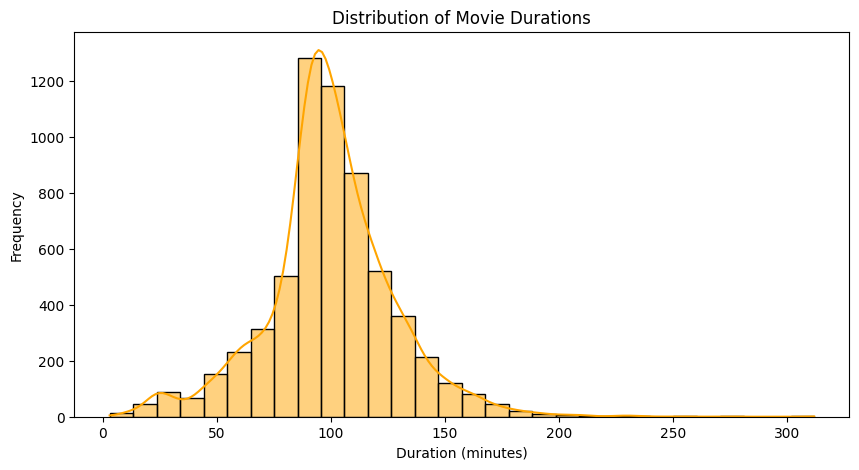

In [23]:
# Analyze Duration of Content
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Remove 'min' and convert to int, handling NaNs
# Replace NaNs with empty strings before converting to integers
movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce').astype('Int64')

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(movies_df['duration'], bins=30, color='orange', kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

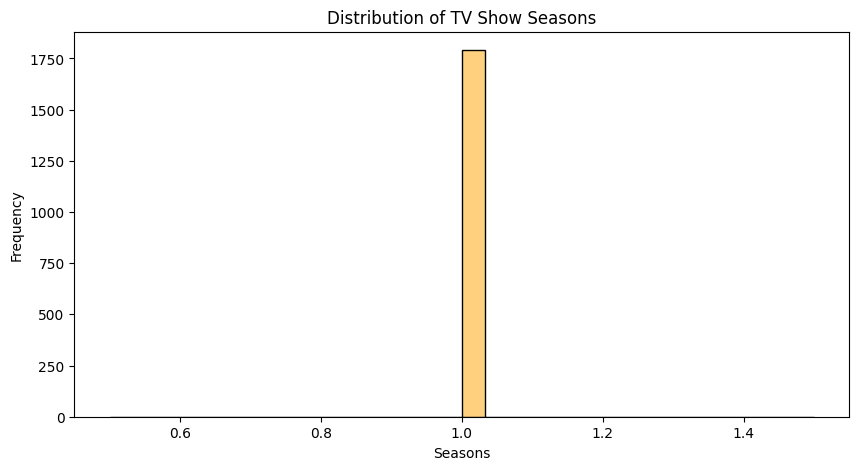

In [24]:
# Filter only TV Shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Remove 'Season' and convert to int, handling Na
tv_shows_df['duration'] = pd.to_numeric(tv_shows_df['duration'].str.replace(' Season', ''), errors='coerce').astype('Int64')

#plot
plt.figure(figsize=(10, 5))
sns.histplot(tv_shows_df['duration'], bins=30, color='orange', kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.show()

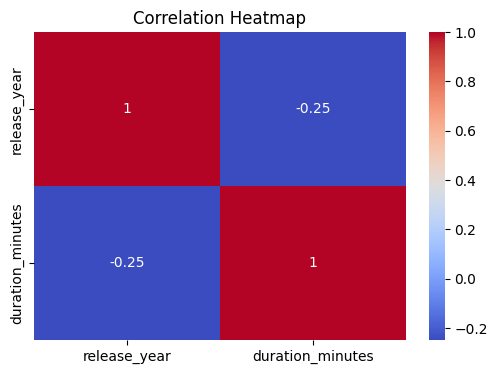

In [25]:
#Step 12: Heatmap of Correlation (Optional Insight)
# Create a simplified dataframe for correlation
df_corr = df.copy()

# Handle durations (already cleaned in previous steps)
df_corr['release_year'] = pd.to_numeric(df_corr['release_year'], errors='coerce')

# Create a dummy column for duration
df_corr['duration_minutes'] = pd.to_numeric(df_corr['duration'].str.extract('(\d+)')[0], errors='coerce')

# Drop rows with missing numeric values
df_corr = df_corr[['release_year', 'duration_minutes']].dropna()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Summary
✅ Netflix EDA Summary
🔸 1. Data Loading & Initial Exploration
Loaded Netflix dataset and checked basic info using .head(), .info(), and .describe().

🔸 2. Missing Value Treatment
Identified missing values in columns like cast, director, and rating.

Decided not to drop all missing values — handled them smartly depending on context.

🔸 3. Data Cleaning
Split and cleaned duration column (converted to minutes for movies, separated out seasons for TV shows).

Extracted and cleaned release_year.

🔸 4. Univariate Analysis
Used plots to analyze the distribution of:

Types of content (Movie vs TV Show)

Ratings (like TV-MA, PG, etc.)

Content across countries

Yearly release trends

🔸 5. Genre Analysis
Extracted and counted individual genres from listed_in using Counter.

Plotted top 10 most common genres.

🔸 6. Cast Analysis
Processed the cast column to find most frequently appearing actors.

🔸 7. Director Insights
Counted most featured directors on Netflix.

🔸 8. Content Trend Over Years
Analyzed how releases evolved over time, broken down by Movie and TV Show.

🔸 9. Optional: Correlation Heatmap
Plotted correlations between numeric features like release_year and duration_minutes.